In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
df.rename(columns = {'Monthly beer production': 'Oluen määrä kuukaudessa'}, inplace = True)

df.head()


,Oluen määrä kuukaudessa
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


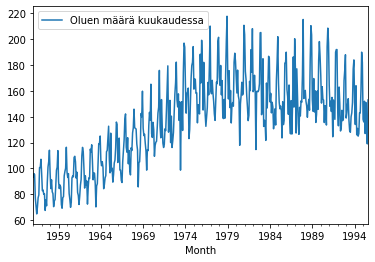

In [9]:
df.plot()

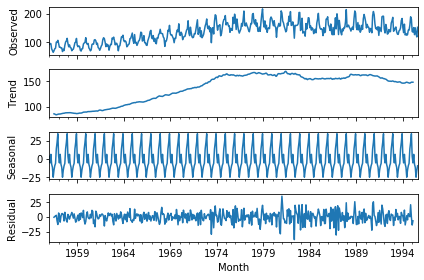

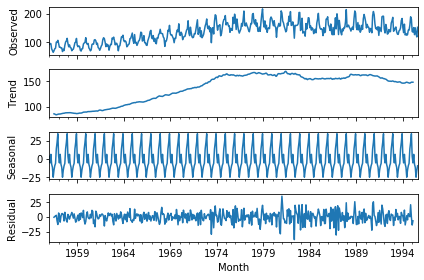

In [11]:
from statsmodels.tsa.api import seasonal_decompose

seasonal_decompose(df['Oluen määrä kuukaudessa']).plot()

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing

malli = ExponentialSmoothing(df['Oluen määrä kuukaudessa']).fit()

C:\Users\Bige\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
df['Ennuste oluen määrästä'] = malli.fittedvalues
df

,Oluen määrä kuukaudessa,Ennuste oluen määrästä
Month,,
1956-01-01,93.2,93.203435
1956-02-01,96.0,93.201107
1956-03-01,95.2,95.097960
1956-04-01,77.1,95.167114
1956-05-01,70.9,82.922754
1956-06-01,64.8,74.774749
1956-07-01,70.1,68.014709
1956-08-01,77.3,69.427943
1956-09-01,79.5,74.762957


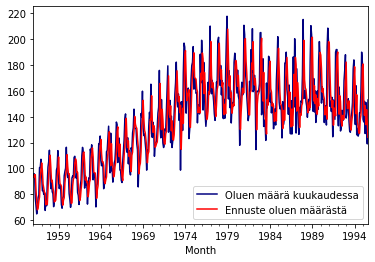

In [17]:
df.plot(color=['navy', 'red'])

In [18]:
df['Ennustevirhe'] = malli.resid
df

,Oluen määrä kuukaudessa,Ennuste oluen määrästä,Ennustevirhe
Month,,,
1956-01-01,93.2,93.203435,-0.003435
1956-02-01,96.0,93.201107,2.798893
1956-03-01,95.2,95.097960,0.102040
1956-04-01,77.1,95.167114,-18.067114
1956-05-01,70.9,82.922754,-12.022754
1956-06-01,64.8,74.774749,-9.974749
1956-07-01,70.1,68.014709,2.085291
1956-08-01,77.3,69.427943,7.872057
1956-09-01,79.5,74.762957,4.737043


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error', mean_squared_error(df['Oluen määrä kuukaudessa'], df['Ennuste oluen määrästä']))
print('mean absolute error', mean_absolute_error(df['Oluen määrä kuukaudessa'], df['Ennuste oluen määrästä']))

mean squared error 356.770219307242
mean absolute error 14.934240842075576


Text(0, 0.5, 'Ennustevirhe')

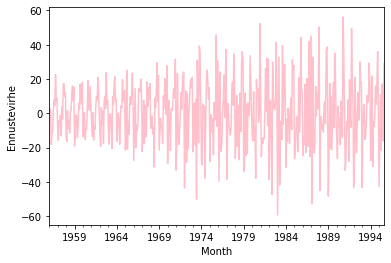

In [22]:
df['Ennustevirhe'].plot(color=['pink'])
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut oluen määrä kuukaudessa')

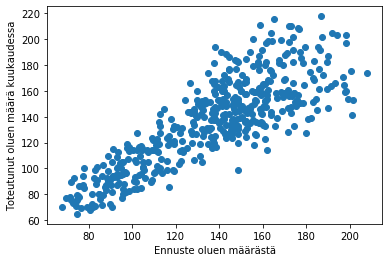

In [23]:
plt.scatter(x = df['Ennuste oluen määrästä'], y = df['Oluen määrä kuukaudessa'])
plt.xlabel('Ennuste oluen määrästä')
plt.ylabel('Toteutunut oluen määrä kuukaudessa')

In [30]:
index = pd.date_range('2020-01-01', periods = 5, freq = 'M')

ennusteet = malli.forecast(5)

df_ennuste = pd.DataFrame(data = ennusteet, index = index, columns = ['Ennuste oluen määrästä'])

df_ennuste

#koitin ennustaa oluen määrää tulevina kuukausina, mutta ennuste näyttää vain "NaN"

,Ennuste oluen määrästä
2020-01-31,NaN
2020-02-29,NaN
2020-03-31,NaN
2020-04-30,NaN
2020-05-31,NaN
